In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

#### Задача 1

Дана матрица объект-признак X и значения целевой переменной y.

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [2]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
              [-0.18757272, 1.30337355, 5.12093014, 3.46363202],
              [-0.81094525, 1.82463398, 5.79686488, 1.86159445],
              [ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
              [ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
              [-0.62972637, 0.77750764, 2.84124027, 4.54410559],
              [ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
              [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
              [ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
              [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
              7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])


def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

def R_2(X):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(X.T).dot(y)

    y_pred = X.dot(b)
    e = y - y_pred
    R = 1 - sum_of_squares(e) / sum_of_squares(y)
    return R

a = [(0,1), (0,2), (0,3), (1, 2), (1,3), (2,3)]
r2 = 0
col1 = 0
col2 = 0
for item in a:
    i, j = item[0], item[1]
    df = np.array([[row[i], row[j]] for row in X ])
    r2_item = R_2(df)
    if r2_item > r2:
        r2 = r2_item
        col1 = i
        col2 = j
        
X = np.array([[row[col1], row[col2]] for row in X ])
print(f'R2 = {r2}, первый признак в колонке {col1 + 1}, второй - в колонке {col2 + 1}')
X

R2 = 0.5717210122042005, первый признак в колонке 2, второй - в колонке 4


array([[2.30868478, 2.69287214],
       [1.30337355, 3.46363202],
       [1.82463398, 1.86159445],
       [2.67392052, 1.66746094],
       [1.97367255, 1.69755173],
       [0.77750764, 4.54410559],
       [1.81206697, 1.51874636],
       [2.26971361, 2.61081203],
       [3.17563985, 5.10773362],
       [2.87988651, 1.59635987]])

In [3]:
n = X.shape[0]
k1 = X.shape[1]
k2 = n - k1 - 1
alpha = 0.05

F = (r2/k1) / ((1-r2)/k2)
t = stats.f.ppf(1-alpha, k1, k2)
print(f"F-test statistic = {round(F, 3)}, Student's t statistic = {round(t, 3)}.")
if F < t:
    print('Cтатистика не попадает в критическую область, гипотеза о равенстве нулю коэффициента детерминации не отвергается.')
    print('Получившееся уравнение регрессии не является стстистически значимым')
else:
    print('Cтатистика попадает в критическую область, гипотеза о равенстве нулю коэффициента детерминации отвергается.')
    print('Получившееся уравнение регрессии является стстистически значимым')

F-test statistic = 4.672, Student's t statistic = 4.737.
Cтатистика не попадает в критическую область, гипотеза о равенстве нулю коэффициента детерминации не отвергается.
Получившееся уравнение регрессии не является стстистически значимым


#### Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

In [4]:
n_a = 2509
purch_a = 77

n_b = 1465 
purch_b = 60

lambda_a = purch_a / n_a
lambda_b = purch_b / n_b

# H0 lambla_a = lambla_b, H1 lambla_a != lambla_b. Двухсторонний тест
print(f'Условию задачи соответствует распределение Пуассона с параметром lambda = {round(lambda_a, 4)}')
print('H0: lambla_a = lambla_b, H1: lambla_a != lambla_b. Двухсторонний тест')

print(f'Вероятность,что X меньше или равен {round(lambda_b, 4)} = {round(stats.poisson.cdf(lambda_b, lambda_a),4)}')
alpha = 0.05
print(f'Для того, чтобы отвергнуть нулевую гипотезу, p-value должно быть меньше {alpha / 2}')
print(f'В нашем случае p-value = {round(1 - stats.poisson.cdf(lambda_b, lambda_a), 4)},\
следователььно отличие конверсии на страницах A и B значимым не является.')

Условию задачи соответствует распределение Пуассона с параметром lambda = 0.0307
H0: lambla_a = lambla_b, H1: lambla_a != lambla_b. Двухсторонний тест
Вероятность,что X меньше или равен 0.041 = 0.9698
Для того, чтобы отвергнуть нулевую гипотезу, p-value должно быть меньше 0.025
В нашем случае p-value = 0.0302,следователььно отличие конверсии на страницах A и B значимым не является.


#### Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок.

По каждой паре выборок посчитайте:

* выборочное среднее и дисперсию каждой выборки,
* коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [5]:
data = {"x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
        "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
        "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
        "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
        "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}

df = {}
n = 0
for key in data:
    if n % 2 == 0:
        mean_x = np.round(np.array(data[key]).mean(), 2)
        var_x = np.round(np.array(data[key]).var(),2)
        array_x = np.array(data[key])
        key_x = key        
        n += 1            
    else:
        mean_y = np.round(np.array(data[key]).mean(), 2)
        var_y = np.round(np.array(data[key]).var(),2)
        array_y = np.array(data[key])
        corr_xy = np.round(np.corrcoef(array_x,array_y), 4)[0][1]
        b1 = np.round(array_x.T.dot(array_y), 2)
        b0 = np.round(mean_y - b1 * mean_x, 1)
        new_key = (key_x + '_' + key)
        df[new_key] = mean_x, mean_y, corr_xy, b0, b1        
        n += 1
df

{'x1_y1': (9.0, 7.5, 0.8164, -7170.9, 797.6),
 'x2_y2': (9.0, 7.5, 0.8162, -7170.8, 797.59),
 'x3_y3': (9.0, 7.5, 0.8163, -7169.7, 797.47),
 'x4_y4': (9.0, 7.5, 0.8165, -7170.7, 797.58)}

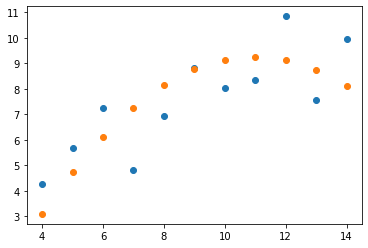

In [6]:
plt.scatter(data['x1'], data['y1'])
plt.scatter(data['x2'], data['y2'])
plt.show()

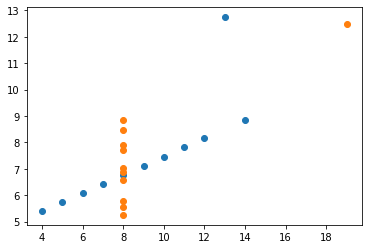

In [7]:
plt.scatter(data['x3'], data['y3'])
plt.scatter(data['x4'], data['y4'])
plt.show()